In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("data/houses_train.csv")

In [16]:
data.shape

(1460, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
data[['GrLivArea', 'YearBuilt', 'SalePrice']]

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [13]:
data.filter(like='Bsmt').columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [ ]:
data[['YrSold', 'MoSold']] # 2008-02

,YrSold,MoSold
0,2008,2
1,2007,5
2,2008,9
3,2006,2
4,2008,12
...,...,...
1455,2007,8
1456,2010,2
1457,2010,5
1458,2010,4


In [21]:
def add_0_to_month(month: int) -> str:
  if month < 10:
    return "0"+ str(month)
  else:
    return str(month)
  
assert(add_0_to_month(10)=='10')
assert(add_0_to_month(2)=='02')


In [22]:
data['MoSold'] = data['MoSold'].apply(lambda month: add_0_to_month(month))

In [25]:
data['SaleDateStr'] = data['YrSold'].astype(str) + '-' + data['MoSold']

In [29]:
data['SaleDateStr'] = pd.to_datetime(data['SaleDateStr'])

In [30]:
data['SaleDateStr'].head(2)

0   2008-02-01
1   2007-05-01
Name: SaleDateStr, dtype: datetime64[ns]

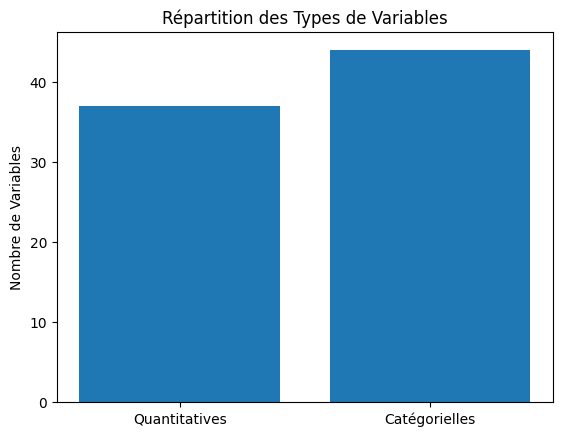

In [35]:
types_variables = {'Quantitatives': len(data.select_dtypes(include=['float', 'int']).columns),
                   'Catégorielles': len(data.select_dtypes(include=['object']).columns)}

plt.bar(types_variables.keys(), types_variables.values())
plt.title('Répartition des Types de Variables')
plt.ylabel('Nombre de Variables')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


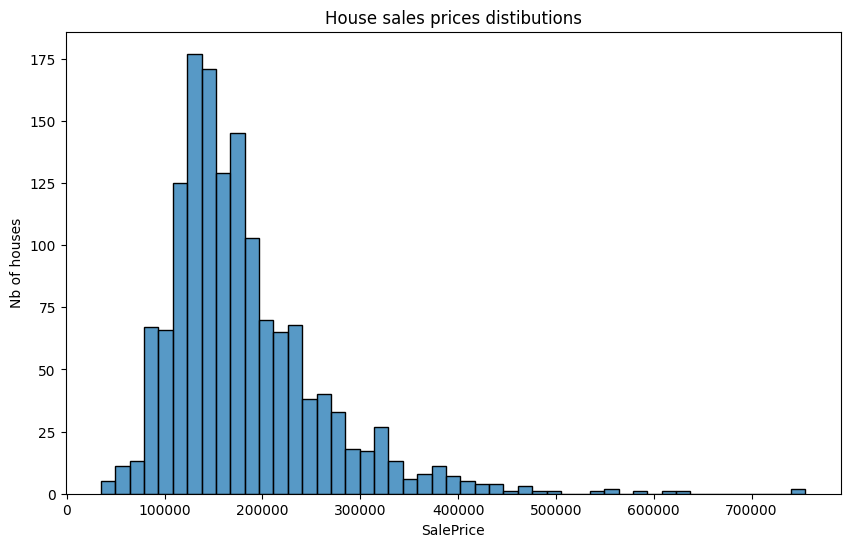

In [36]:
plt.figure(figsize=(10,6))
#plt.hist(data['SalePrice'], bins=30, edgecolor='black')
sns.histplot(data['SalePrice'])
plt.title('House sales prices distibutions')
plt.xlabel('SalePrice')
plt.ylabel('Nb of houses')
plt.show()

Quels sont les quartiers uppés vs populaires ? 

In [38]:
neighborhood_counts = data['Neighborhood'].value_counts()
print(neighborhood_counts)

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


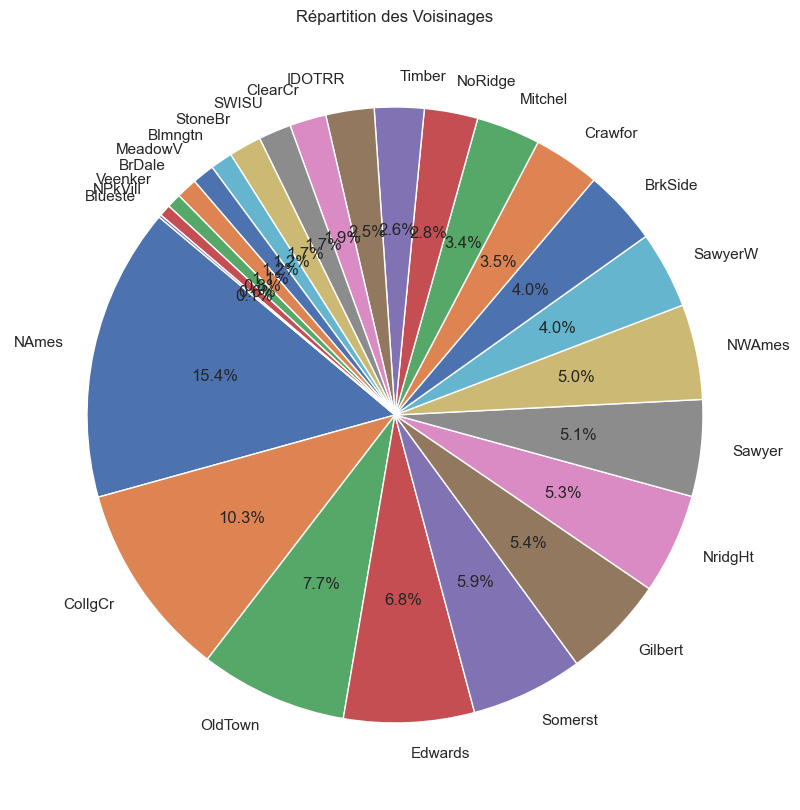

In [39]:
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")
plt.pie(neighborhood_counts, labels=neighborhood_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des Voisinages')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


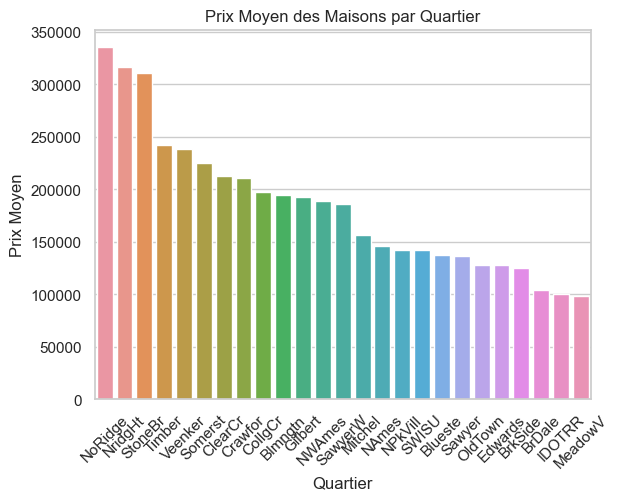

In [40]:
mean_prices = data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(x=mean_prices.index, y=mean_prices.values)
plt.xticks(rotation=45)
plt.title('Prix Moyen des Maisons par Quartier')
plt.ylabel('Prix Moyen')
plt.xlabel('Quartier')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


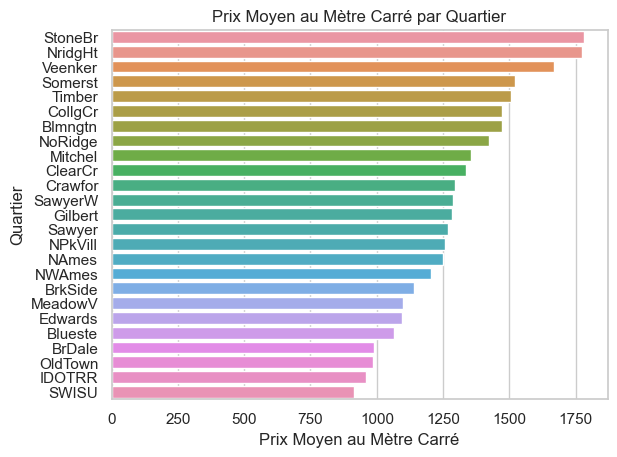

In [41]:
FTSQ_MSQ_RATIO = 0.092903 # 1 ftsq = 0.092903 m2
data['PricePerSqMt'] = data['SalePrice'] / (data['GrLivArea'] * FTSQ_MSQ_RATIO)
mean_price_per_sqmt = data.groupby('Neighborhood')['PricePerSqMt'].mean().sort_values(ascending=False)
# Visualisation
sns.barplot(x=mean_price_per_sqmt.values, y=mean_price_per_sqmt.index)
plt.title('Prix Moyen au Mètre Carré par Quartier')
plt.xlabel('Prix Moyen au Mètre Carré')
plt.ylabel('Quartier')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


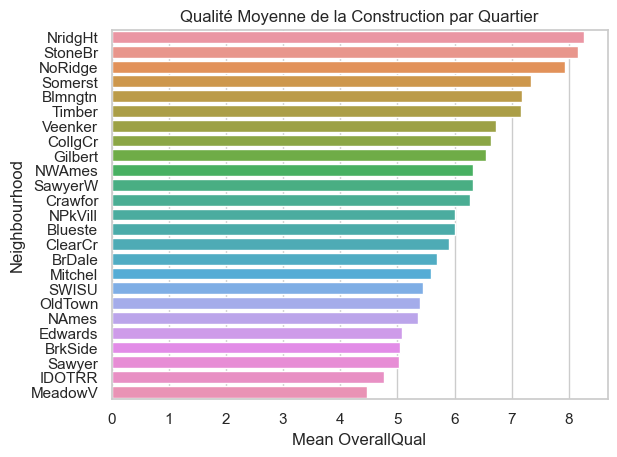

In [42]:
mean_quality = data.groupby('Neighborhood')['OverallQual'].mean().sort_values(ascending=False)

# Visualisation
sns.barplot(x=mean_quality.values, y=mean_quality.index)
plt.title('Qualité Moyenne de la Construction par Quartier')
plt.xlabel('Mean OverallQual')
plt.ylabel('Neighbourhood')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


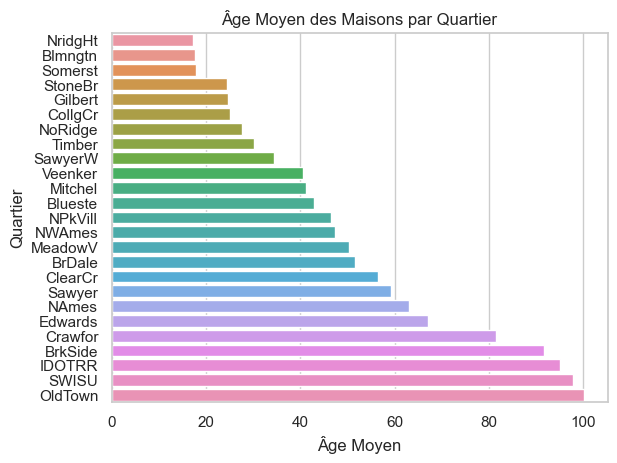

In [43]:
data['HouseAge'] = 2023 - data['YearBuilt']
mean_age = data.groupby('Neighborhood')['HouseAge'].mean().sort_values()
sns.barplot(x=mean_age.values, y=mean_age.index)
plt.title('Âge Moyen des Maisons par Quartier')
plt.xlabel('Âge Moyen')
plt.ylabel('Quartier')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


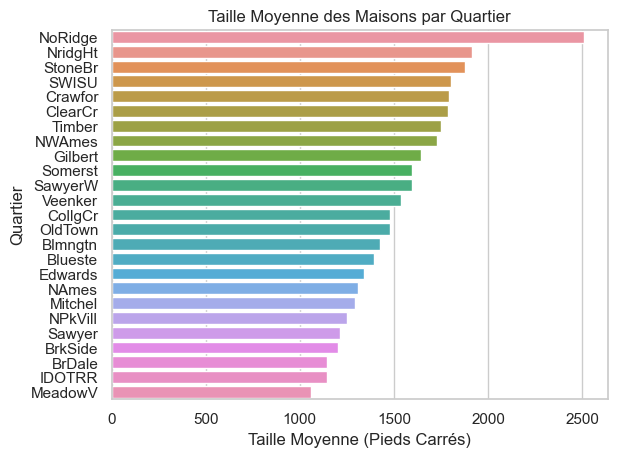

In [44]:
mean_size = data.groupby('Neighborhood')['GrLivArea'].mean().sort_values(ascending=False)

# Visualisation
sns.barplot(x=mean_size.values, y=mean_size.index)
plt.title('Taille Moyenne des Maisons par Quartier')
plt.xlabel('Taille Moyenne (Pieds Carrés)')
plt.ylabel('Quartier')
plt.show()

Prix vs Qualité

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


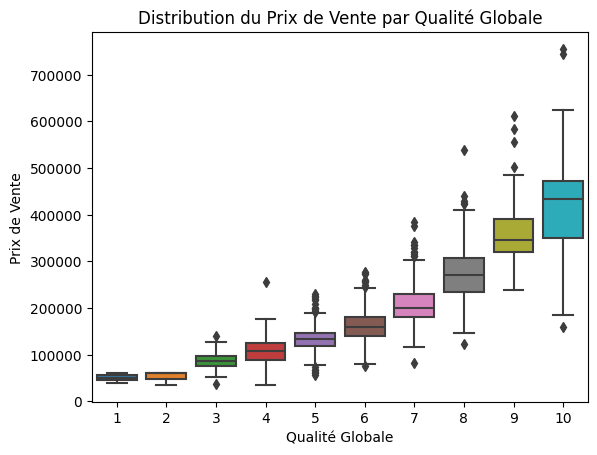

In [37]:
sns.boxplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Distribution du Prix de Vente par Qualité Globale')
plt.xlabel('Qualité Globale')
plt.ylabel('Prix de Vente')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


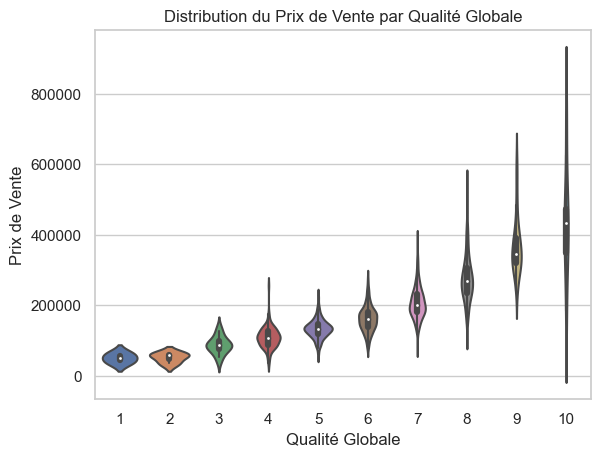

In [ ]:
sns.violinplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Distribution du Prix de Vente par Qualité Globale')
plt.xlabel('Qualité Globale')
plt.ylabel('Prix de Vente')
plt.show()

/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/SIMON/EPISEN_TP_DATAMINING/tp_datamining/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_n

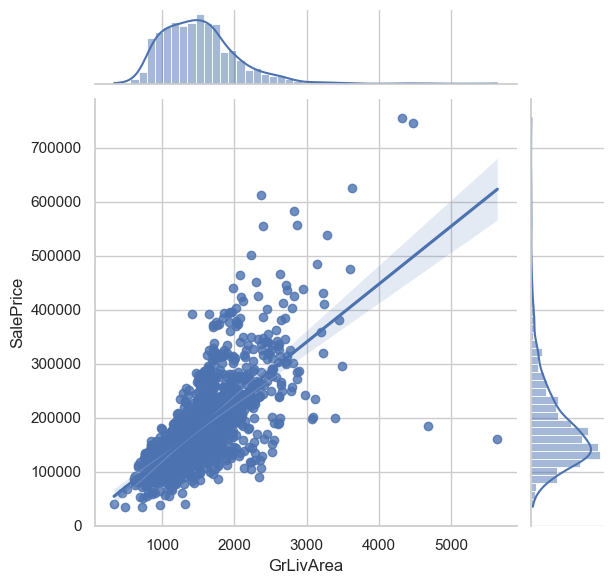

In [46]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=data, kind='reg')
plt.show()